In [1]:
import numpy as np 
import pandas as pd 
import cv2
from matplotlib import pyplot as plt

import os


def showImage(img):
    plt.figure(figsize=(15,15))
    plt.imshow(np.uint8(img),cmap='gray')
    plt.xticks([]),plt.yticks([])
    plt.show()


In [2]:
def selectQMatrix(qName):
    Q10 = np.array([[80,60,50,80,120,200,255,255],
                [55,60,70,95,130,255,255,255],
                [70,65,80,120,200,255,255,255],
                [70,85,110,145,255,255,255,255],
                [90,110,185,255,255,255,255,255],
                [120,175,255,255,255,255,255,255],
                [245,255,255,255,255,255,255,255],
                [255,255,255,255,255,255,255,255]])

    Q50 = np.array([[16,11,10,16,24,40,51,61],
                [12,12,14,19,26,58,60,55],
                [14,13,16,24,40,57,69,56],
                [14,17,22,29,51,87,80,62],
                [18,22,37,56,68,109,103,77],
                [24,35,55,64,81,104,113,92],
                [49,64,78,87,103,121,120,101],
                [72,92,95,98,112,100,130,99]])

    Q90 = np.array([[3,2,2,3,5,8,10,12],
                    [2,2,3,4,5,12,12,11],
                    [3,3,3,5,8,11,14,11],
                    [3,3,4,6,10,17,16,12],
                    [4,4,7,11,14,22,21,15],
                    [5,7,11,13,16,12,23,18],
                    [10,13,16,17,21,24,24,21],
                    [14,18,19,20,22,20,20,20]])
    if qName == "Q10":
        return Q10
    elif qName == "Q50":
        return Q50
    elif qName == "Q90":
        return Q90
    else:
        return np.ones((8,8)) #it suppose to return original image back

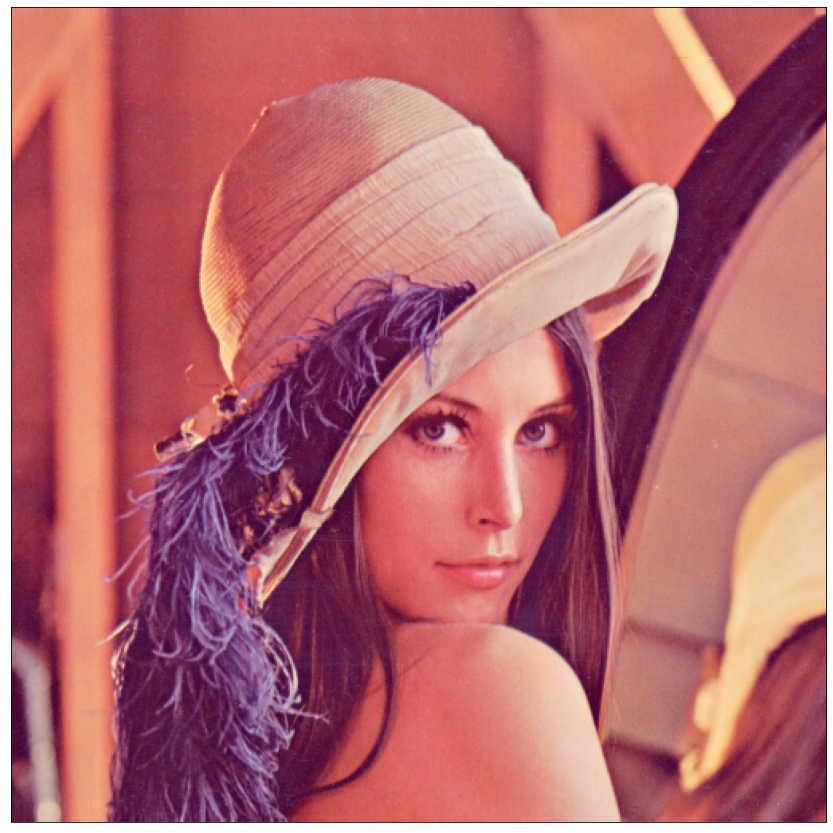

In [3]:
import cv2
img = cv2.imread('/home/rushil/Documents/Academics/Image Processing/Image Processing/lenna.png')
img = img[:, :, [2, 1, 0]]
showImage(img)


In [4]:
height  = len(img) #one column of image
width = len(img[0]) # one row of image
sliced = [] # new list for 8x8 sliced image 

block = 8

npImg = np.array(img);
print(img[:,:,0]);

# print(height)
# print(width)


print(img.shape)
# print(img)





tempImg = np.zeros((4,4,3))



# tempImg[:,:,0] = [[1,2,3,4],
#                   [5,6,7,8],
#                   [9,10,11,12],
#                   [13,14,15,16]]


# tempImg[:,:,1] = [[17,18,19,20],
#                   [21,22,23,24],
#                   [25,26,27,28],
#                   [29,30,31,32]]



# tempImg[:,:,2] = [[33,34,35,36],
#                   [37,38,39,40],
#                   [41,42,43,44],
#                   [45,46,47,48]]



# print(tempImg[:,:,0])
# print(tempImg[:,:,1])
# print(tempImg[:,:,2])

# height  = len(tempImg) #one column of image
# width = len(tempImg[0]) # one row of image
# sliced = []
# block = 2


[[226 226 223 ... 230 221 200]
 [226 226 223 ... 230 221 200]
 [226 226 223 ... 230 221 200]
 ...
 [ 84  84  92 ... 173 172 177]
 [ 82  82  96 ... 179 181 185]
 [ 82  82  96 ... 179 181 185]]
(512, 512, 3)


In [5]:

sliced = []
temp = []

#For each z dimension
for k in range(0,3,1):
    print(k)
    #temp.clear() #Clearing temporary array on every iteration
    temp = []
    index = 0
    currY = 0 #current Y index
    for i in range(block,height+1,block):
        currX = 0 #current X index
        for j in range(block,width+1,block):
            
            #Making blocks of 2x2 from the matrix
            temp.append(img[currY:i, currX:j, k] - np.ones((8,8))*128) #appending blocks to a temporary array
            currX = j
        currY = i
        

        
    sliced.append(temp) #Appending temporary array to final array
    






0
1
2


In [6]:

dctSliced = []
dctTemp = []



for k in range(0,3,1):
    dctTemp = []
    for x in sliced[k]:
        dctx = cv2.dct(x)
        y = cv2.idct(dctx)
        #print(x)
        #print("gap")
        #print(dctx)
        dctTemp.append(dctx)
    dctSliced.append(dctTemp)
    

print(dctSliced[0][0])



# DCToutput = [];
# for part in imf:
#     for i in range(0,3,1):
#         currDCT = cv2.dct(part[:,:,i])
#     DCToutput.append(currDCT)
# npDCToutput = np.array(DCToutput);
# print(npDCToutput.ndim);


[[ 7.82750000e+02 -7.10081609e+00  8.15640312e+00  4.23828243e+00
  -1.75000000e+00 -3.59788316e+00 -1.21370839e+00  2.50910534e+00]
 [-1.50922848e+00  4.24728092e-01  4.74012062e-03  1.89611832e+00
   7.84361541e-01  1.24773589e+00 -3.35816833e+00 -8.67269852e-01]
 [-7.09324174e-01 -7.94963836e-01 -7.37436867e-01 -9.25819434e-01
  -1.35299025e-01 -2.06023709e-01  9.26776695e-01  1.01934611e+00]
 [ 2.68279562e+00  1.03579613e+00  1.36761868e+00  2.07955341e-01
  -4.84709651e-01 -4.63988370e-01  9.54900027e-01 -1.27566589e+00]
 [-3.25000000e+00 -9.24996293e-01 -1.49790468e+00 -2.48824251e-01
   7.50000000e-01  1.86000630e-01 -1.00313587e+00  1.55655778e+00]
 [ 2.39393161e+00  5.25665890e-01  1.12419673e+00  8.46671802e-01
  -6.24545078e-01  7.49151441e-01 -4.25436276e-01 -1.68907761e+00]
 [-1.05917856e+00 -1.17458377e-01 -5.73223305e-01 -1.28424429e+00
   3.26640741e-01 -1.43341641e+00  1.73743687e+00  1.48715034e+00]
 [ 2.09591370e-01 -5.66096804e-02  1.79297087e-01  9.77137842e-01
  -

In [7]:

selectedQMatrix = selectQMatrix("Q90")

quantTemp = []
quantSliced = []

for k in range(0,3,1):
    quantTemp = []
    for x in dctSliced[k]:
        #print(x)
        x = np.round(x/selectedQMatrix)
        #print("gap")
        #print(x)
        quantTemp.append(x)
        #print(x)
    quantSliced.append(quantTemp)
    
#print("FInal")
print(quantSliced[0][0])


[[261.  -4.   4.   1.  -0.  -0.  -0.   0.]
 [ -1.   0.   0.   0.   0.   0.  -0.  -0.]
 [ -0.  -0.  -0.  -0.  -0.  -0.   0.   0.]
 [  1.   0.   0.   0.  -0.  -0.   0.  -0.]
 [ -1.  -0.  -0.  -0.   0.   0.  -0.   0.]
 [  0.   0.   0.   0.  -0.   0.  -0.  -0.]
 [ -0.  -0.  -0.  -0.   0.  -0.   0.   0.]
 [  0.  -0.   0.   0.  -0.   0.  -0.  -0.]]


In [8]:
selectedQMatrix = selectQMatrix("Q10")

invQuantTemp = []
invQuantSliced = []

print(quantSliced[0][0])

for k in range(0,3,1):
    invQuantTemp = []
    for x in quantSliced[k]:
        #print(x)
        x = np.round(x * selectedQMatrix)
        #print("gap")
        #print(x)
        invQuantTemp.append(x)
    invQuantSliced.append(invQuantTemp)

print(invQuantSliced[0][0])

[[261.  -4.   4.   1.  -0.  -0.  -0.   0.]
 [ -1.   0.   0.   0.   0.   0.  -0.  -0.]
 [ -0.  -0.  -0.  -0.  -0.  -0.   0.   0.]
 [  1.   0.   0.   0.  -0.  -0.   0.  -0.]
 [ -1.  -0.  -0.  -0.   0.   0.  -0.   0.]
 [  0.   0.   0.   0.  -0.   0.  -0.  -0.]
 [ -0.  -0.  -0.  -0.   0.  -0.   0.   0.]
 [  0.  -0.   0.   0.  -0.   0.  -0.  -0.]]
[[20880.  -240.   200.    80.    -0.    -0.    -0.     0.]
 [  -55.     0.     0.     0.     0.     0.    -0.    -0.]
 [   -0.    -0.    -0.    -0.    -0.    -0.     0.     0.]
 [   70.     0.     0.     0.    -0.    -0.     0.    -0.]
 [  -90.    -0.    -0.    -0.     0.     0.    -0.     0.]
 [    0.     0.     0.     0.    -0.     0.    -0.    -0.]
 [   -0.    -0.    -0.    -0.     0.    -0.     0.     0.]
 [    0.    -0.     0.     0.    -0.     0.    -0.    -0.]]


In [9]:
invDCTSliced = []
invDCTTemp = []

for k in range(0,3,1):
    invDCTTemp = []
    for x in invQuantSliced[k]:
        #print(x)
        invDCTx = cv2.idct(x)
        #print("gap")
        #print(invDCTx)
        invDCTTemp.append(invDCTx)
    invDCTSliced.append(invDCTTemp)
    #print(len(invDCTTemp))
    
    




In [10]:
revTemp = []
revSliced = []

for k in range(0,3,1):
    revTemp = []
    for x in invDCTSliced[k]:
        x = x + np.ones((8,8))*128
        x = np.round(x)
        #print(x)
        revTemp.append(x)
    revSliced.append(revTemp)
    #print(len(revTemp))
#print(len(revSliced))

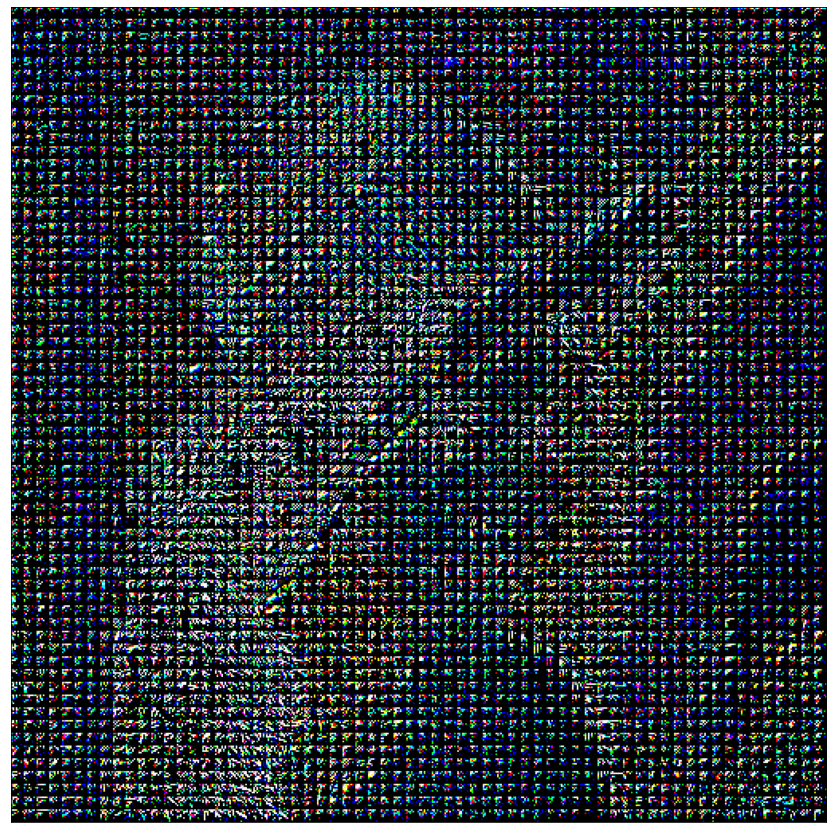

Original


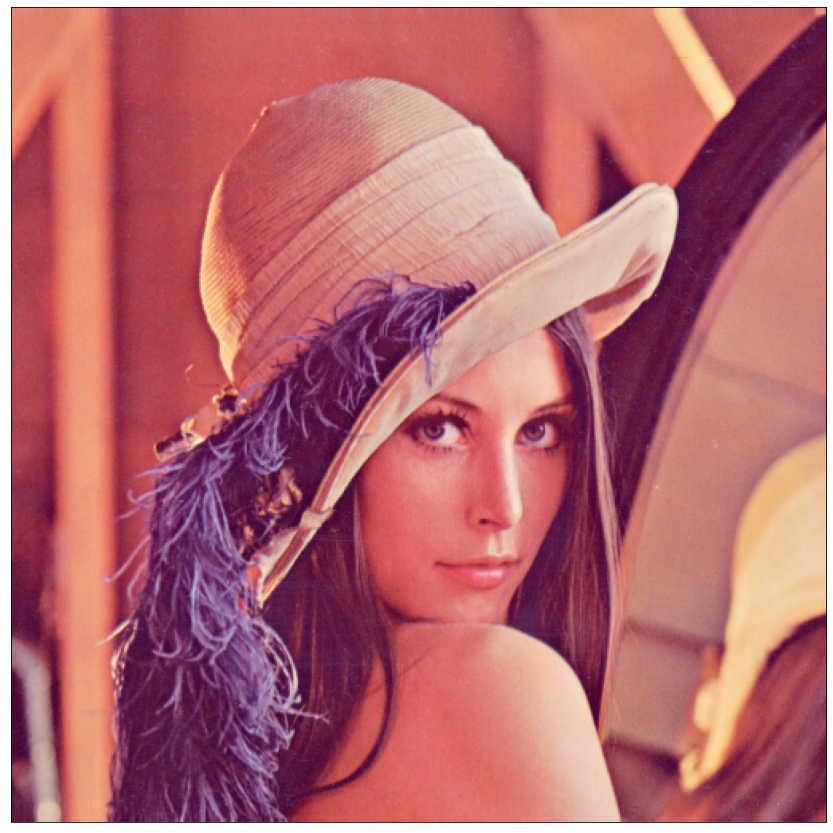

In [11]:
rowCount = np.round(len(img[:,:,0])/block)

columnCount = np.round(len(img[:,:,0][0])/block)



npCompImg =np.zeros(  (len(img[:,:,0]),len(img[:,:,0][0]), 3) )

#print(revSliced[0])

for k in range(0,3,1):
    compressedImg = np.ones((len(img[:,:,0]),len(img[:,:,0][0])))
    index = 0
    currY = 0 #current Y index
    for i in range(block,height+1,block):
        currX = 0 #current X index
        for j in range(block,width+1,block):
            compressedImg[currY:i, currX:j] = quantSliced[k][index]
            index = index+1
            currX = j
        currY = i
    npCompImg[:,:,k] = compressedImg


# print(npCompImg)
# print("Gap")
# print(img)


#plt.imshow(np.uint8(npCompImg))





showImage(npCompImg)
print("Original")
showImage(img)

In [4]:
filename = '/home/rushil/Documents/Python/Image Processing/Compression/out_test.bin'
outfile = open(filename, 'wb')
print(bytes('*', 'utf8'))
outfile.write(bytes('*', 'utf8'))
outfile.close()

b'*'


1

In [5]:
infile = open(filename, 'rb')
byte = infile.read(1)
if(byte == b'*'):
    print("yes")


yes


In [15]:
filename =  "/home/rushil/Documents/Python/Image Processing/Compression/ci.bin"
infile = open(filename, 'rb')
count = 0
infile.seek(2469)
byte = infile.read(1)
while(byte != b'&' ):
    byte = infile.read(1)
    count += 1;
    print(infile.tell(), byte)
print("Count", count)

2471 b'z'
2472 b'\xd3'
2473 b'\xf5'
2474 b'\xbe'
2475 b'9'
2476 b'_'
2477 b'\xff'
2478 b'\xff'
2479 b'\xff'
2480 b'\xff'
2481 b'\xff'
2482 b'\xff'
2483 b'\r'
2484 b'\x80'
2485 b'\xa5'
2486 b'j'
2487 b'\xd5'
2488 b'u'
2489 b'_'
2490 b'\xff'
2491 b'\xff'
2492 b'\xff'
2493 b'\xff'
2494 b'\xff'
2495 b'\xde'
2496 b'd'
2497 b'\xe6'
2498 b'J'
2499 b'U'
2500 b'\xaf'
2501 b'\xff'
2502 b'\xff'
2503 b'\xff'
2504 b'\xff'
2505 b'\xff'
2506 b'\xff'
2507 b'\x86'
2508 b'\xea'
2509 b'q'
2510 b'L'
2511 b'\xb2'
2512 b'\xb9'
2513 b'\xaf'
2514 b'\xff'
2515 b'\xff'
2516 b'\xff'
2517 b'\xff'
2518 b'\xff'
2519 b'\xfd'
2520 b'\xeb'
2521 b'O'
2522 b'#'
2523 b'h'
2524 b'\xae'
2525 b'\xba'
2526 b'\xff'
2527 b'\xff'
2528 b'\xff'
2529 b'\xff'
2530 b'\xff'
2531 b'\xff'
2532 b'\xc1'
2533 b'\x88'
2534 b'1'
2535 b'\xf9'
2536 b','
2537 b'\xb5'
2538 b'u'
2539 b'?'
2540 b'?'
2541 b'\xff'
2542 b'\xff'
2543 b'\xff'
2544 b'\xff'
2545 b'\xfe'
2546 b'\x18'
2547 b'\x08'
2548 b':'
2549 b'\xdc'
2550 b'\xd3'
2551 b'\xff'
2552 b'\x